In [56]:
from Data_cleaning import clean_data, standardize_data
from Classification_Model import RandomForestClassifierModel, AdaBoostClassifierModel, CatBoostClassifierModel, XGBClassifierModel, LGBMClassifierModel, get_metrics_LGBMClassifierModel
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import random
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer, confusion_matrix
from sklearn.pipeline import make_pipeline


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline
from lightgbm import LGBMClassifier


from ipywidgets import interactive

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

warnings.filterwarnings("ignore")

%matplotlib inline


In [38]:
df = pd.read_csv('Data/Airline_Dataset.csv')
df1 = clean_data(df)
df2 = standardize_data(df1)
df2

,Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,0,3,3,5,3,5,5,4,3,4,4,5,5,1,1,1
1,0,3,3,1,3,1,1,1,5,3,1,4,1,0,0,0
2,0,2,5,2,2,2,2,2,5,3,1,4,2,1,0,0
3,1,3,3,4,5,5,3,3,4,4,3,3,3,1,0,0
4,0,3,2,1,2,1,1,3,4,4,4,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69061,0,1,1,4,1,4,4,5,2,5,2,3,4,0,0,1
69062,0,3,3,4,3,4,4,3,2,4,4,5,4,0,0,0
69063,0,2,1,2,1,2,2,4,3,4,5,4,2,1,1,1
69064,1,3,3,4,4,4,4,3,2,5,4,5,4,1,0,0


In [39]:
y = df2['Satisfaction']
X = df2.drop('Satisfaction',axis=1)

In [40]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(
    x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))


In [42]:
metrics_RandomForestClassifierModel = RandomForestClassifierModel(x_train, y_train, x_val, y_val)
metrics_AdaBoostClassifierModel = AdaBoostClassifierModel(x_train, y_train, x_val, y_val)
metrics_CatBoostClassifierModel = CatBoostClassifierModel(x_train, y_train, x_val, y_val)
metrics_XGBClassifierModel = XGBClassifierModel(x_train, y_train, x_val, y_val)

Model_LGBMClassifier = LGBMClassifierModel(x_train, y_train)
metrics_LGBMClassifierModel = get_metrics_LGBMClassifierModel(Model_LGBMClassifier, x_val, y_val)

In [43]:
metric_dic = {**metrics_RandomForestClassifierModel, **metrics_AdaBoostClassifierModel, **metrics_CatBoostClassifierModel,**metrics_XGBClassifierModel,**metrics_LGBMClassifierModel}
model = ['Random Forest', 'AdaBoost', 'CatBoost','XGBoost','LGBM']
scoring = ['ACC', 'AUC', 'Precision', 'Recall']
model_name = ['RandomForestClassifierModel', 'AdaBoostClassifierModel', 'CatBoostClassifierModel','XGBClassifierModel','LGBMClassifierModel']
model_list = []

for i in model:
    for j in scoring:
        for key, value in metric_dic.items():
            model_dic = {'model': i, 'scoring': j, 'score': metric_dic["Mean_"+j+"_"+model_name[model.index(i)]]}
        model_list.append(model_dic)

In [44]:
model_df = pd.DataFrame(model_list)
model_df

,model,scoring,score
0,Random Forest,ACC,0.954537
1,Random Forest,AUC,0.990284
2,Random Forest,Precision,0.965135
3,Random Forest,Recall,0.931395
4,AdaBoost,ACC,0.932722
5,AdaBoost,AUC,0.977940
6,AdaBoost,Precision,0.932217
7,AdaBoost,Recall,0.915546
8,CatBoost,ACC,0.958108
9,CatBoost,AUC,0.993024


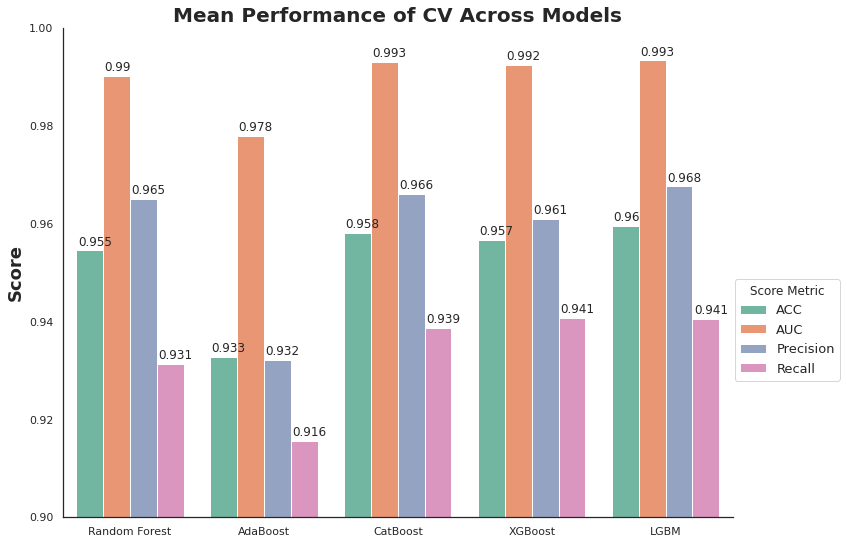

In [45]:
sns.set(style='white',font_scale=1)
fig = plt.figure(figsize=[12,9])
ax = sns.barplot(x='model',y='score',data=model_df,hue='scoring',palette='Set2')
for p in ax.patches:
        ax.annotate(p.get_height().round(3), (p.get_x()+0.01, p.get_height()+0.001))
plt.legend(title='Score Metric',loc="upper right", bbox_to_anchor=(1.17, 0.5),fontsize=13)
plt.ylim([0.90,1.0])
#plt.yticks(range[0.20,1.00])
plt.xlabel('',weight='bold',fontsize='15')
plt.ylabel('Score',weight='bold',fontsize='18')
plt.title('Mean Performance of CV Across Models',weight='bold',fontsize=20)
sns.despine()
plt.savefig('modelbarplot.png',transparent=True, bbox_inches='tight')

Utilisation de GridSearchCV pour définir les meilleurs paramètre pour le modèle LGBM

In [46]:
gsc = GridSearchCV(
        estimator=LGBMClassifier(),
        param_grid={
            'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
            'boosting_type': ['gbdt'],
            'max_depth': [1, 10, 20, 30, 40, 60, 200],
            'random_state': [42]
            },
        cv=5,
        n_jobs=6
    )

grid_result = gsc.fit(x_train, y_train)

In [47]:
best_params = grid_result.best_params_
best_score = grid_result.best_score_
print(best_params)
print(best_score)

{'boosting_type': 'gbdt', 'learning_rate': 0.15, 'max_depth': 20, 'random_state': 42}
0.962798499132122


In [48]:
model = LGBMClassifier(boosting_type=best_params["boosting_type"], learning_rate=best_params["learning_rate"],
                       max_depth=best_params["max_depth"], random_state=best_params["random_state"])


In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
metrics_LGBMClassifierModel_GS = {'modele': 'LGBMClassifierModel',
                                   'Mean_ACC_LGBMClassifierModel': cross_val_score(model, x_val, y_val, cv=5, scoring='accuracy').mean(),
                                   'Mean_AUC_LGBMClassifierModel': cross_val_score(model, x_val, y_val, cv=5, scoring='roc_auc').mean(),
                                   'Mean_Precision_LGBMClassifierModel': cross_val_score(model, x_val, y_val, cv=5, scoring='precision').mean(),
                                   'Mean_Recall_LGBMClassifierModel': cross_val_score(model, x_val, y_val, cv=5, scoring='recall').mean()
                                   }
metrics_LGBMClassifierModel_GS

{'modele': 'LGBMClassifierModel',
 'Mean_ACC_LGBMClassifierModel': 0.958011583011583,
 'Mean_AUC_LGBMClassifierModel': 0.9932413245724977,
 'Mean_Precision_LGBMClassifierModel': 0.9633359325945501,
 'Mean_Recall_LGBMClassifierModel': 0.9413807965971157}

In [51]:
metrics_LGBMClassifierModel

{'modele': 'LGBMClassifierModel',
 'Mean_ACC_LGBMClassifierModel': 0.9595559845559846,
 'Mean_AUC_LGBMClassifierModel': 0.9934113103952589,
 'Mean_Precision_LGBMClassifierModel': 0.967618193055429,
 'Mean_Recall_LGBMClassifierModel': 0.9405117044804172}

La comparaison des model LGBM avec et sans optimisation des paramètres avec GridSearchCV montre que cette amélioration n'est que très peu significative donc nous conservons le model sans optimisation

## Model Evalutation

In [52]:
Model_LGBMClassifier

Pipeline(steps=[('lgbmclassifier', LGBMClassifier())])

In [53]:
import joblib

In [65]:
joblib.dump(Model_LGBMClassifier, 'model.pkl')

['model.pkl']

In [66]:
model_load = joblib.load('model.pkl')

In [70]:
neweconomy = []
neweconomy = pd.DataFrame(neweconomy)neweconomy.append({'Inflight Wifi Service':5,'Ease Of Online Booking':5,'Food And Drink':1,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':1,'Leg Room':1,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':1,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':1,'Class_Economy':1}) 

neweconomy

,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,5,5,1,5,5,5,1,1,5,5,1,5,0,1,1


In [89]:
result = model_load.predict_proba(neweconomy)
#result[0, 1]*100

for r in result:
    print(str((100*r).round(1)))

[ 0.1 99.9]


In [90]:
result = model_load.predict_proba(neweconomy)
result = {'Predicted Satisfaction': result[0, 1]}
result

{'Predicted Satisfaction': 0.9992608085879993}

In [34]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

2022-07-04 13:15:06.995213: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-04 13:15:06.995240: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [35]:
Y = pd.get_dummies(y1).values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = Sequential()

model.add(Dense(100, activation='relu')),
model.add(Dense(25, activation='relu')),
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=100, epochs=20)


NameError: name 'Sequential' is not defined

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.12250098586082458
Test accuracy: 0.9541769027709961


In [ ]:
import keras

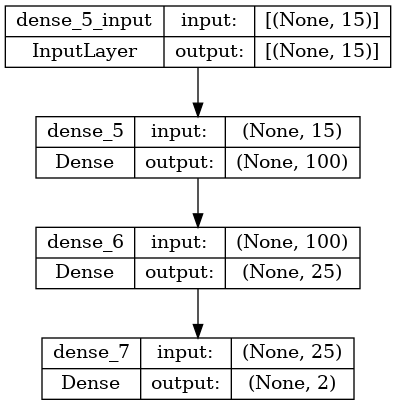

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
CatboostModel = CatBoostClassifier()
CatboostModel.fit(X_valid, y_valid)
print(CatboostModel.score(X_valid, y_valid))

Learning rate set to 0.031611
0:	learn: 0.6491273	total: 4.52ms	remaining: 4.52s
1:	learn: 0.5930394	total: 8.49ms	remaining: 4.24s
2:	learn: 0.5542369	total: 12.4ms	remaining: 4.11s
3:	learn: 0.5159427	total: 16.4ms	remaining: 4.09s
4:	learn: 0.4763117	total: 21ms	remaining: 4.18s
5:	learn: 0.4484608	total: 25.5ms	remaining: 4.23s
6:	learn: 0.4237859	total: 29.9ms	remaining: 4.24s
7:	learn: 0.4014656	total: 34.6ms	remaining: 4.29s
8:	learn: 0.3809181	total: 38.7ms	remaining: 4.26s
9:	learn: 0.3628901	total: 43.6ms	remaining: 4.32s
10:	learn: 0.3479793	total: 48.4ms	remaining: 4.35s
11:	learn: 0.3348008	total: 53ms	remaining: 4.36s
12:	learn: 0.3224244	total: 57.3ms	remaining: 4.35s
13:	learn: 0.3107211	total: 61.6ms	remaining: 4.34s
14:	learn: 0.2999175	total: 66.6ms	remaining: 4.37s
15:	learn: 0.2887641	total: 70.6ms	remaining: 4.34s
16:	learn: 0.2781098	total: 75ms	remaining: 4.33s
17:	learn: 0.2649507	total: 79.7ms	remaining: 4.35s
18:	learn: 0.2535117	total: 85.3ms	remaining: 4.4s

In [ ]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    #(model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    satisfaction_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=120)
    ax = sns.heatmap(satisfaction_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
           yticklabels=['Neutral/Dissatisfied', 'Satisfied']);   
    plt.xlabel('Prediction',weight='bold',fontsize=12)
    plt.ylabel('Actual',weight='bold',fontsize=12)
    plt.title('Confusion Matrix',weight='bold',fontsize=15)
    plt.plot()

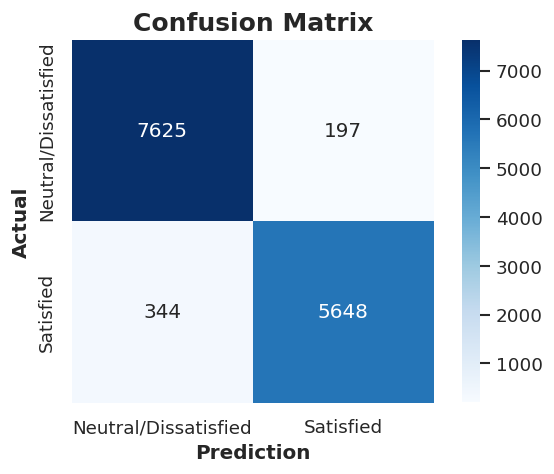

In [ ]:
sns.set(style='white',font_scale=1)
make_confusion_matrix(CatboostModel)

In [ ]:
interactive(lambda threshold: make_confusion_matrix(CatboostModel, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [ ]:
y_predict = CatboostModel.predict_proba(X_test)[:, 1]>=0.7
precision_score(y_test, y_predict)

0.9878441186986057

In [ ]:
recall_score(y_test, y_predict)

0.9222296395193591

In [ ]:
f1_score(y_test, y_predict)

0.953909891248058

In [ ]:
roc_auc_score(y_test, CatboostModel.predict_proba(X_test)[:, 1])

0.9936574961962409

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, CatboostModel.predict_proba(X_test)[:,1])

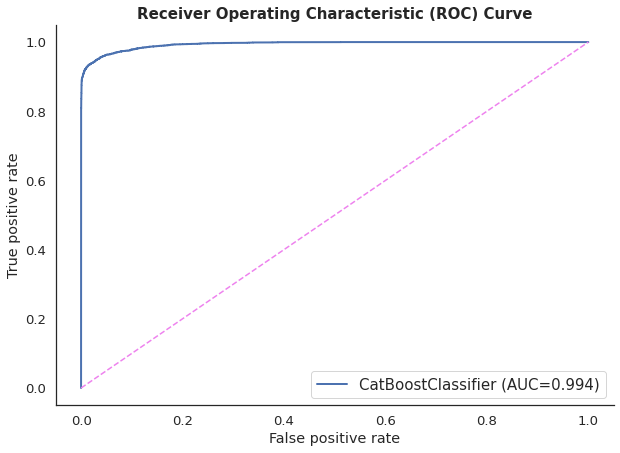

In [ ]:
sns.set(style='white',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
plt.plot(fpr, tpr,lw=2,label='CatBoostClassifier (AUC={:.3f})'.format(roc_auc_score(y_test, CatboostModel.predict_proba(X_test)[:,1])))
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc="lower right",fontsize=15)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve',weight='bold',fontsize=15);
sns.despine()
plt.savefig('ROCplot.png',transparent=True, bbox_inches='tight')

In [ ]:
feature_list = []

feature_importances = CatboostModel.get_feature_importance()
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    feature_dic = {'feature': name, 'score': score}
    feature_list.append(feature_dic)

feature_df = pd.DataFrame(feature_list)
feature_df


,feature,score
0,Type Of Travel_Personal Travel,22.515978
1,Inflight Wifi Service,20.123275
2,Online Boarding,7.695617
3,Customer Type_Returning Customer,7.072207
4,Class_Economy,6.761609
5,Baggage Handling,5.476483
6,Inflight Service,4.799745
7,Checkin Service,4.592208
8,Seat Comfort,4.230932
9,Inflight Entertainment,3.853509


Text(0.5, 1.0, 'Catboost - Feature Importance')

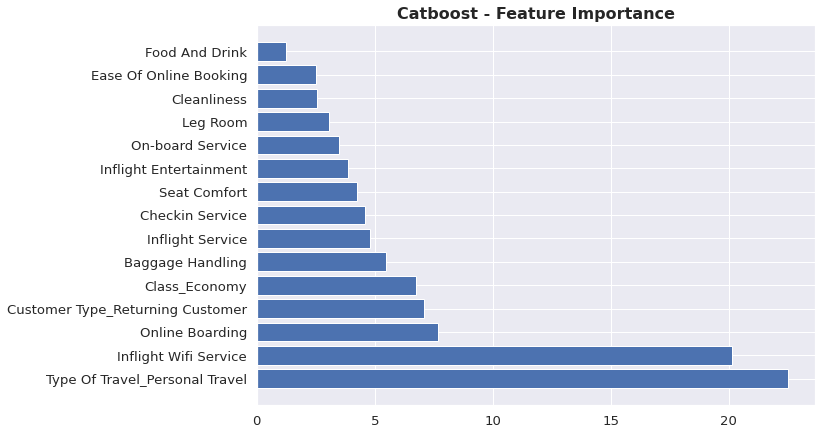

In [ ]:
sns.set(style='darkgrid',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
ax = plt.barh(feature_df['feature'],feature_df['score'])
plt.title('Catboost - Feature Importance',weight='bold',fontsize=16)

In [ ]:
CatboostModel.save_model("CatboostModel")

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier()
model.load_model("CatboostModel")

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('CatboostModel.pickle', 'wb'))

In [ ]:
model1 = CatBoostClassifier()
model1.load_model('CatboostModel')

In [ ]:
print(feature_df.feature)

0       Type Of Travel_Personal Travel
1                Inflight Wifi Service
2                      Online Boarding
3     Customer Type_Returning Customer
4                        Class_Economy
5                     Baggage Handling
6                     Inflight Service
7                      Checkin Service
8                         Seat Comfort
9               Inflight Entertainment
10                    On-board Service
11                            Leg Room
12                         Cleanliness
13              Ease Of Online Booking
14                      Food And Drink
Name: feature, dtype: object


In [ ]:
data = [['TCO','OQTF','31','PAF','1','macédonienne','Passeport','R','1','0','0','0',"1"]]
#data = [["NIM","OQTF","69","PAF","0","congolaise","SD","0","0","0","0","0","0"]]
#data = [["COQ","OQTF","62","PAF","1","congolaise","SD","N","0","0","0","0","0"]]

df = pd.DataFrame(data,columns=["CRA","MESURE_ELOI","PREF_PLACE","SERV_INTERPEL","SEXE","NATIONALITE","DOCUMENT","DOC_VALID","SEP","FSPRT","ESIZ","Terroriste","ARV"])
df
result = model.predict_proba(df)
#result = {'eloignement_Probability': result[0, 1]}
result

NameError: name 'model' is not defined

In [91]:
import pandas as pd

In [92]:
 ParameterList0_5 = ["Inflight Wifi Service", "Ease Of Online Booking", "Food And Drink"
                        "Online Boarding", "Seat Comfort", "Inflight Entertainment", 
                        "On-board Service", "Leg Room", "Baggage Handling", 
                        "Checkin Service", "Inflight Service", "Cleanliness", 
                        ]

ParameterList0_1 = ["Class_Economy", "Customer Type_Returning Customer", "Type Of Travel_Personal Travel"]



In [93]:
odd_numbers = [1, 3, 5, 7, 9] 

even_numbers = [2, 4, 6, 8, 10] 

numbers = [y for x in [odd_numbers, even_numbers] for y in x]

print("Concatenated list of Numbers : \n \n" + str(numbers)) 

Concatenated list of Numbers : 
 
[1, 3, 5, 7, 9, 2, 4, 6, 8, 10]
